In [1]:
import pandas as pd
import numpy as np

df_reads = pd.read_csv("./logs/log.csv", encoding = "utf-8")
display(df_reads)
display(df_reads.info())

,day,date,title,author,minutes
0,1,17-01-2026,O Conde de Monte Cristo,Alexandre Dumas,88
1,2,18-01-2026,O Conde de Monte Cristo,Alexandre Dumas,23
2,3,19-01-2026,O Conde de Monte Cristo,Alexandre Dumas,105
3,4,20-01-2026,O conde de monte cristo,Alexandre Dumas,60
4,5,21-01-2026,O conde de monte cristo,Alexandre Dumas,99
5,6,22-01-2026,O conde de monte cristo,Alexandre Dumas,137
6,7,23-01-2026,O conde de monte cristo,Alexandre Dumas,75
7,8,24-01-2026,o conde de monte cristo,alexandre dumas,82
8,9,25-01-2026,O conde de monte cristo,alexandre dumas,100
9,10,26-01-2026,o conde de monte cristo,alexandre dumas,92


<class 'pandas.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   day      18 non-null     int64
 1   date     18 non-null     str  
 2   title    18 non-null     str  
 3   author   18 non-null     str  
 4   minutes  18 non-null     int64
dtypes: int64(2), str(3)
memory usage: 852.0 bytes


None

In [2]:
df_analise = df_reads
df_analise["date"] = pd.to_datetime(df_analise["date"], dayfirst = True)
df_analise["title"] = df_analise["title"].str.strip()
df_analise["title"] = df_analise["title"].str.title()
df_analise["author"] = df_analise["author"].str.strip()
df_analise["author"] = df_analise["author"].str.title()

display(df_analise)
display(df_analise.info())

,day,date,title,author,minutes
0,1,2026-01-17,O Conde De Monte Cristo,Alexandre Dumas,88
1,2,2026-01-18,O Conde De Monte Cristo,Alexandre Dumas,23
2,3,2026-01-19,O Conde De Monte Cristo,Alexandre Dumas,105
3,4,2026-01-20,O Conde De Monte Cristo,Alexandre Dumas,60
4,5,2026-01-21,O Conde De Monte Cristo,Alexandre Dumas,99
5,6,2026-01-22,O Conde De Monte Cristo,Alexandre Dumas,137
6,7,2026-01-23,O Conde De Monte Cristo,Alexandre Dumas,75
7,8,2026-01-24,O Conde De Monte Cristo,Alexandre Dumas,82
8,9,2026-01-25,O Conde De Monte Cristo,Alexandre Dumas,100
9,10,2026-01-26,O Conde De Monte Cristo,Alexandre Dumas,92


<class 'pandas.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   day      18 non-null     int64         
 1   date     18 non-null     datetime64[us]
 2   title    18 non-null     str           
 3   author   18 non-null     str           
 4   minutes  18 non-null     int64         
dtypes: datetime64[us](1), int64(2), str(2)
memory usage: 852.0 bytes


None

In [3]:
df_analise["total minutes"] = df_analise["minutes"].cumsum()
df_analise["minutes per day"] = (df_analise["minutes"].cumsum() / df_analise["day"]).round(2)
df_analise["hours"] = (df_analise["minutes"] / 60).round(2)
df_analise["total hours"] = df_analise["hours"].cumsum()
df_analise["hours per day"] = (df_analise["hours"].cumsum() / df_analise["day"]).round(2)

df_most_read_books = df_analise.groupby("title")[["minutes", "hours"]].sum().sort_values("minutes", ascending=False)
df_most_read_books["days qtd"] = df_analise.groupby("title")["day"].count()

df_most_read_authors = df_analise.groupby("author")[["minutes", "hours"]].sum().sort_values("minutes", ascending=False)
df_most_read_authors["days qtd"] = df_analise.groupby("author")["day"].count()



display(df_analise)
display(df_analise.describe().round(2))
display(df_most_read_books)
display(df_most_read_authors)

,day,date,title,author,minutes,total minutes,minutes per day,hours,total hours,hours per day
0,1,2026-01-17,O Conde De Monte Cristo,Alexandre Dumas,88,88,88.00,1.47,1.47,1.47
1,2,2026-01-18,O Conde De Monte Cristo,Alexandre Dumas,23,111,55.50,0.38,1.85,0.92
2,3,2026-01-19,O Conde De Monte Cristo,Alexandre Dumas,105,216,72.00,1.75,3.60,1.20
3,4,2026-01-20,O Conde De Monte Cristo,Alexandre Dumas,60,276,69.00,1.00,4.60,1.15
4,5,2026-01-21,O Conde De Monte Cristo,Alexandre Dumas,99,375,75.00,1.65,6.25,1.25
5,6,2026-01-22,O Conde De Monte Cristo,Alexandre Dumas,137,512,85.33,2.28,8.53,1.42
6,7,2026-01-23,O Conde De Monte Cristo,Alexandre Dumas,75,587,83.86,1.25,9.78,1.40
7,8,2026-01-24,O Conde De Monte Cristo,Alexandre Dumas,82,669,83.62,1.37,11.15,1.39
8,9,2026-01-25,O Conde De Monte Cristo,Alexandre Dumas,100,769,85.44,1.67,12.82,1.42
9,10,2026-01-26,O Conde De Monte Cristo,Alexandre Dumas,92,861,86.10,1.53,14.35,1.43


,day,date,minutes,total minutes,minutes per day,hours,total hours,hours per day
count,18.00,18,18.00,18.00,18.00,18.00,18.00,18.00
mean,9.06,2026-01-25 01:20:00,83.22,778.89,82.82,1.39,12.98,1.38
min,1.00,2026-01-17 00:00:00,17.00,88.00,55.50,0.28,1.47,0.92
25%,5.25,2026-01-21 06:00:00,63.75,409.25,82.03,1.06,6.82,1.37
50%,9.50,2026-01-25 12:00:00,90.50,815.00,85.38,1.50,13.58,1.42
75%,13.00,2026-01-29 00:00:00,104.00,1119.25,87.96,1.73,18.65,1.47
max,16.00,2026-02-01 00:00:00,161.00,1498.00,93.62,2.68,24.95,1.56
std,4.76,NaN,41.36,445.23,9.48,0.69,7.42,0.16


,minutes,hours,days qtd
title,,,
O Conde De Monte Cristo,1460,24.32,16
Le Banquet,38,0.63,2


,minutes,hours,days qtd
author,,,
Alexandre Dumas,1460,24.32,16
Platão,38,0.63,2


,date,minutes,dia da semana
0,2026-01-17,88,Saturday
1,2026-01-18,23,Sunday
2,2026-01-19,105,Monday
3,2026-01-20,60,Tuesday
4,2026-01-21,99,Wednesday
5,2026-01-22,137,Thursday
6,2026-01-23,75,Friday
7,2026-01-24,82,Saturday
8,2026-01-25,100,Sunday
9,2026-01-26,92,Monday


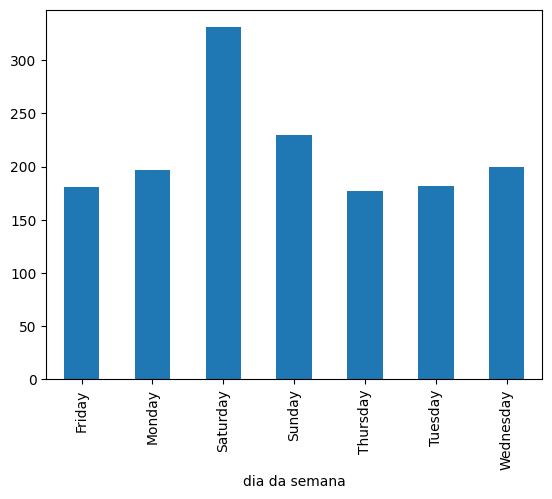

In [22]:
df = df_analise[["date", "minutes"]]
df["dia da semana"] = df["date"].dt.day_name()

df_graph = df.groupby("dia da semana")["minutes"].sum()
df_graph.plot(kind = "bar")

display(df)